## Notebook to explain the $\epsilon$-greedy algorithm in the context of a $k$-armed bandit problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.colors import Normalize
import random

1. We start off with $k$ actions. Each one has a reward associated with it. We assume these reward functions follow Gaussians. The goal is to estimate the reward as best we can.
2. Initialize the estimates for rewards as being 0's (we have no priors)
3. Start the process. We choose an action and update the reward estimates using incremental implementation.
4. The choice of action is crucial. Pick random float $j \in [0,1]$ if $j < \epsilon$, we pick a random action. Else, we pick the action that has the highest mean reward so far, i.e. the greedy action
5. Continue, and track the reward. Compare for different $\epsilon$

## Part 1. The usual

In [2]:
font = {'family': 'sans-serif', 'size': 18}
plt.rc('font', **font)
col_map = cm.PiYG
norm = Normalize(vmin=-10, vmax=10) 

def epsilon_greedy(k, epsilon, plot):

    sigma = 1.
    means = [random.randint(0, 25) for i in range(k)] #let's assume the value of each action can be sampled from gaussian distribution
    reward_aves = [0 for i in range(k)] #can modify this to accomodate for priors!
    counts = [0 for i in range(k)]
    actual_reward = []
    print(f'means = {means} for actions {np.arange(k)}')
    
    T = 1000
    t = 0
    while t < T:
    
        t += 1
        
        #pick random number [0,1] if it is smaller than epsilon. Randomly select action
        delta = random.uniform(0,1)
        if delta < epsilon:
            j = random.choice(range(k)) #action's integer. Denoted as j
            R_t = random.gauss(means[j], sigma) #the reward at time t
        else:
            #just pick the one with current max reward
            j = np.argmax(reward_aves)
            R_t = random.gauss(means[j], sigma) #the reward at time t
    
        #update reward estimates
        counts[j] += 1
        reward_aves[j] += 1/counts[j] * ((R_t)-reward_aves[j])
        actual_reward.append(R_t)
    
    if plot:
        fig, ax = plt.subplots()
        ax.plot(np.arange(T), actual_reward, color = col_map(norm(-10)), alpha = .5, linewidth = .5)
        ax.set_xlabel(r'$t$')
        ax.set_ylabel(r'$R_t$')
        ax.tick_params(axis="x", direction="in", length = 4)
        ax.tick_params(axis="y", direction="in", length = 4)
        ax.set_title(r'$\epsilon = {}$'.format(epsilon))

    print(reward_aves)

means = [13, 6, 8, 1, 12, 4, 5, 1, 24, 24] for actions [0 1 2 3 4 5 6 7 8 9]
[12.9932430000621, 5.684399701536761, 8.267378247265682, 0.989288857538427, 11.604405669938586, 3.6498948293671414, 4.98382217955467, 1.2141282024558397, 24.02404965687718, 23.77335711867452]


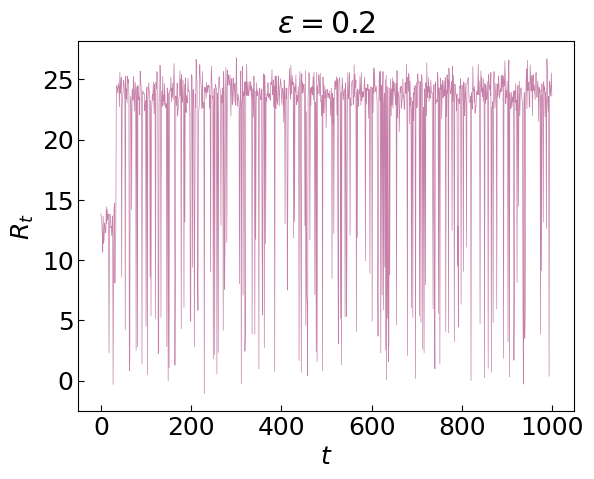

In [3]:
epsilon_greedy(10, 0.2, True)

look how nicely it converges! It started by picking the first action which follows a gaussian of mean 14...far from ideal. And then since $\epsilon$ was non-zero, it found the action that would provide most reward and stuck to it with probability $1-\epsilon + \epsilon/k$. Lots of oscillations after (with $\epsilon$-ish probability) but it does converge to a max value near 21.

means = [5, 12, 19, 17, 2, 11, 13, 21, 1, 22] for actions [0 1 2 3 4 5 6 7 8 9]
[4.969802589575614, 0, 0, 0, 0, 0, 0, 0, 0, 0]


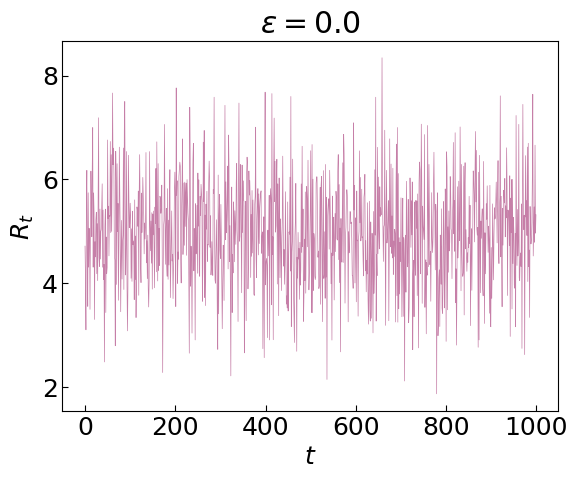

In [4]:
epsilon_greedy(10, 0.0, True)

This is bad. The way I've initialized it, it will start off with the first option. Which is 18. And stays there. When $\epsilon = 0$, there is no exploration, and the system is very sensitive to initial conditions. This might be interested insight if RL is used to study chaotic systems...

means = [25, 23, 13, 21, 21, 7, 25, 1, 24, 12] for actions [0 1 2 3 4 5 6 7 8 9]
[24.97148200096602, 22.942142332295518, 12.916039507460516, 21.13958895713465, 20.885128301360762, 7.120150971721117, 24.889904827294867, 1.1105491019673805, 24.06622710535828, 11.961026011529807]


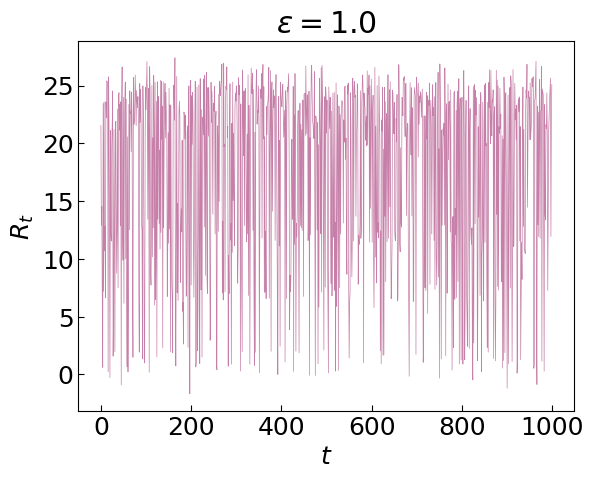

In [5]:
epsilon_greedy(10, 1., True)

Another trivial case. If $\epsilon = 1$ there is only exploration. And that's stupid. No convergence can happen because we refuse to learn and rewards don't matter.

## Part 2. Risky actions
Let's not have constant variance (for a more realistic scenario)

In [100]:
font = {'family': 'sans-serif', 'size': 18}
plt.rc('font', **font)
col_map = cm.plasma
norm = Normalize(vmin=-10, vmax=10) 

def epsilon_greedy_risky():

    means = [5, 15, 4, 11]
    sigmas = [.3, 8, .3, .1]
    k = len(means)
    print(f'means = {means} for actions {np.arange(k)}')
    print(f'sigmas = {sigmas} for actions {np.arange(k)}')
    
    fig, ax = plt.subplots()
    cols = [-10, -3, 3, 10]

    for q, epsilon in enumerate([0., .2, .5, 1.]):

        reward_aves = [0 for i in range(k)] #can modify this to accomodate for priors!
        counts = [0 for i in range(k)]
        actual_reward = []
        
        T = 1000
        t = 0

        while t < T:
        
            t += 1
            
            #pick random number [0,1] if it is smaller than epsilon. Randomly select action
            delta = random.uniform(0,1)
            if delta < epsilon:
                j = random.choice(range(k)) #action's integer. Denoted as j
                R_t = random.gauss(means[j], sigmas[j]) #the reward at time t
            else:
                #just pick the one with current max reward
                j = np.argmax(reward_aves)
                R_t = random.gauss(means[j], sigmas[j]) #the reward at time t
        
            #update reward estimates
            counts[j] += 1
            reward_aves[j] += 1/counts[j] * ((R_t)-reward_aves[j])
            actual_reward.append(R_t)

        ax.plot(np.arange(T), np.cumsum(actual_reward) / np.arange(1, T+1), \
                color = col_map(norm(cols[q])), alpha = .5, linewidth = 2, label = f'$\epsilon$ = {epsilon}')
        ax.set_xlabel(r'$t$')
        ax.set_ylabel(r'$\langle \Sigma_t \, R_t \rangle$')
        ax.tick_params(axis="x", direction="in", length = 4)
        ax.tick_params(axis="y", direction="in", length = 4)
        ax.legend(fontsize = 16)

means = [5, 15, 4, 11] for actions [0 1 2 3]
sigmas = [0.3, 8, 0.3, 0.1] for actions [0 1 2 3]


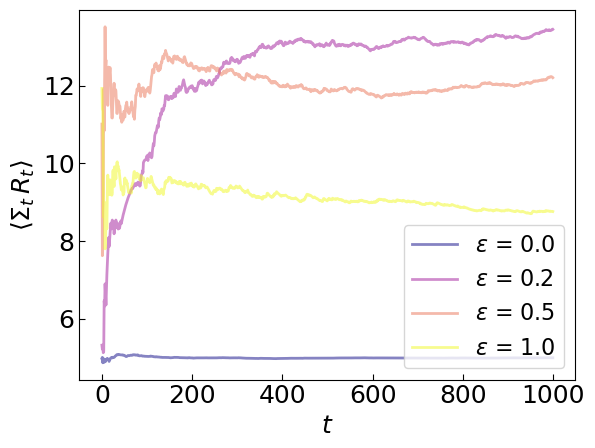

In [101]:
epsilon_greedy_risky()

The mean cumulative sums can go down at some point because sigma is large enough to explore negative values. Forget $\epsilon = 0$ that's the greedy option and it only explores the distribution for initial chosen action. Too much exploration isn't great either. This hyperparameter $\epsilon$ can be optimized for. In this problem, it appears to be closer to 0.2 than to 0.5. 

## Part 3. Upper Bound Action Selection



In [117]:
font = {'family': 'sans-serif', 'size': 18}
plt.rc('font', **font)
col_map = cm.PiYG
norm = Normalize(vmin=-10, vmax=10) 

def epsilon_greedy_ucb():

    epsilons = [.2, 0.]
    means = [5, 15, 4, 11]
    sigmas = [.3, 8, .3, .1]
    k = len(means)
    print(f'means = {means} for actions {np.arange(k)}')
    print(f'sigmas = {sigmas} for actions {np.arange(k)}')
    
    fig, ax = plt.subplots()
    cols = [-10, 10]

    for q, c in enumerate([0., .4]):

        epsilon = epsilons[q]
        reward_aves = [0 for i in range(k)] #can modify this to accomodate for priors!
        counts = [0 for i in range(k)]
        actual_reward = []
        
        T = 1000
        t = 0

        while t < T:
        
            t += 1
            
            #pick random number [0,1] if it is smaller than epsilon. Randomly select action
            delta = random.uniform(0,1)
            if delta < epsilon:
                j = random.choice(range(k)) #action's integer. Denoted as j
                R_t = random.gauss(means[j], sigmas[j]) #the reward at time t
            else:
                #just pick the one with current max reward
                explore = c* np.sqrt(np.log(t)/counts)
                j = np.argmax(reward_aves + explore)
                R_t = random.gauss(means[j], sigmas[j]) #the reward at time t
        
            #update reward estimates
            counts[j] += 1
            reward_aves[j] += 1/counts[j] * ((R_t)-reward_aves[j])
            actual_reward.append(R_t)

        ax.plot(np.arange(T), np.cumsum(actual_reward) / np.arange(1, T+1), \
                color = col_map(norm(cols[q])), alpha = .5, linewidth = 2, label = f'$\epsilon$ = {epsilon}, $c$ = {c}')
        ax.set_xlabel(r'$t$')
        ax.set_ylabel(r'$\langle \Sigma_t \, R_t \rangle$')
        ax.tick_params(axis="x", direction="in", length = 4)
        ax.tick_params(axis="y", direction="in", length = 4)
        ax.legend(fontsize = 16)

means = [5, 15, 4, 11] for actions [0 1 2 3]
sigmas = [0.3, 8, 0.3, 0.1] for actions [0 1 2 3]


C:\Users\ajati\AppData\Local\Temp\ipykernel_19924\2943888020.py:39: RuntimeWarning: invalid value encountered in divide
  explore = c* np.sqrt(np.log(t)/counts)
C:\Users\ajati\AppData\Local\Temp\ipykernel_19924\2943888020.py:39: RuntimeWarning: divide by zero encountered in divide
  explore = c* np.sqrt(np.log(t)/counts)
C:\Users\ajati\AppData\Local\Temp\ipykernel_19924\2943888020.py:39: RuntimeWarning: invalid value encountered in multiply
  explore = c* np.sqrt(np.log(t)/counts)


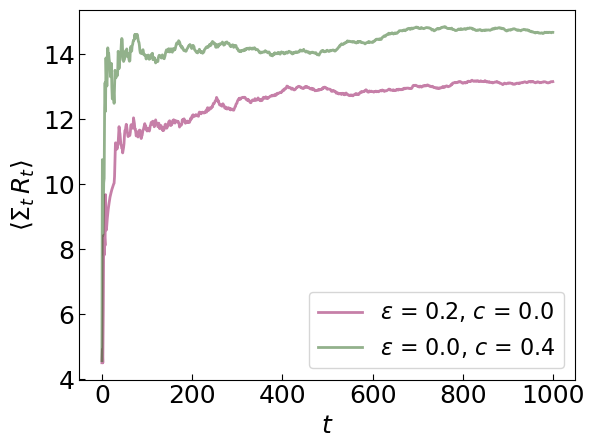

In [122]:
epsilon_greedy_ucb()

Using ucb constantly gives better convergence than epsilon-greedy with no ucb! ucb uses the information we have i.e. variance of sample becoming more and more confident as we see more data. Isn't that what machine learning is all about -- being confident as we see more data!

## Part 4. Gradient Bandit

means = [5, 15, 4, 11] for actions [0 1 2 3]
sigmas = [0.3, 8, 0.3, 0.1] for actions [0 1 2 3]
-10
0
10


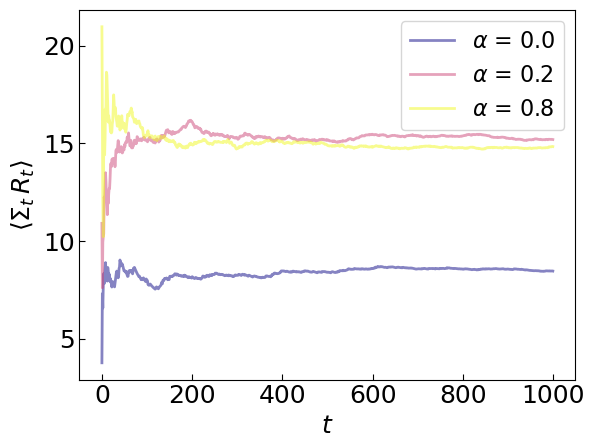

In [149]:
font = {'family': 'sans-serif', 'size': 18}
plt.rc('font', **font)
col_map = cm.plasma
norm = Normalize(vmin=-10, vmax=10) 

def gradient_bandit(baseline=True):
    
    means = [5, 15, 4, 11]  
    sigmas = [.3, 8, .3, .1]
    k = len(means)
    print(f'means = {means} for actions {np.arange(k)}')
    print(f'sigmas = {sigmas} for actions {np.arange(k)}')
    cols = [-10, 0, 10]

    fig, ax = plt.subplots()

    for q, alpha in enumerate([0., .2, .8]):
        
        #initialize preference
        preferences = np.zeros(k) 
        action_probs = np.ones(k)/k 
        actual_reward = []
    
        T = 1000
        t = 0
        average_reward = 0  
    
        while t < T:
            t += 1
            
            action_probs = np.exp(preferences)/np.sum(np.exp(preferences)) #softmax of preferences
            
            j = np.random.choice(np.arange(k), p=action_probs)
            
            R_t = random.gauss(means[j], sigmas[j])
            actual_reward.append(R_t)
            
            #update reward
            if baseline:
                average_reward += (R_t-average_reward) / t
            
            for i in range(k):
                if i == j:
                    preferences[i] += alpha * (R_t-average_reward) * (1-action_probs[i]) #update preferences
                else:
                    preferences[i] -= alpha * (R_t-average_reward) * action_probs[i]

        print(cols[q])
        ax.plot(np.arange(T), np.cumsum(actual_reward)/np.arange(1, T+1), \
                color=col_map(norm(cols[q])), alpha=.5, linewidth=2, label=r'$\alpha$ = {}'.format(alpha))
        ax.set_xlabel(r'$t$')
        ax.set_ylabel(r'$\langle \Sigma_t \, R_t \rangle$')
        ax.tick_params(axis="x", direction="in", length=4)
        ax.tick_params(axis="y", direction="in", length=4)
        ax.legend(fontsize=16)

gradient_bandit()
plt.show()

This time, instead of using estimate of reward, we use preference for taking an action which follows a Boltzmann distribution (logistic for $k=2$). The higher the preference (if the previous reward exceeded a baseline), the higher the probability of selecting it.
$\alpha = 0$ means no  learning. Fixed preferences. $\alpha$ controls speed of learning and stability. If $\alpha$ is too large we may converge or diverge fast. If it is small, we may take time to converge but arrive there surely.